In [14]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import seaborn as sns
from scipy import stats

def ell_1(n):
    U = np.random.uniform(0,1,n)
    tmp = np.array([0,1])
    Final = np.zeros(n)
    U = np.hstack((U,tmp))
    U = np.sort(U)
    for i in range(1,n+1):
        Final[i-1] = U[i] - U[i-1]
    Final = np.reshape(Final, (n,1))
    for j in range(n):
        binom = np.random.binomial(1,.5)
        if(binom == 1):
            Final[j] = Final[j]*(-1)
    return Final

In [336]:
def support(X, val, q): # Set q to be the qth quantile
    return np.quantile((X.T).dot(val), q)

def compute_fb(X, q, n):
    polar_body = np.ones((n,0))
    for i in range(X.shape[1]):
        if support(X, X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])): 
            polar_body = np.hstack((polar_body, np.array(X[:,i]).reshape(n,1)))
    return polar_body

In [16]:
def anderson(e,q,d,n):
    a = (1024/(e**2*(1-q)**2))
    b = n*np.log(a*n) + np.log(4/d)
    return a*b

In [17]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return math.degrees(phi)

In [42]:
def ret_supp(point, ret_vals):
    
    if point[0] == 0:
        m = 0
    else:
        m = -math.pow(point[1]/point[0],-1)
    #print(m)
    b = point[1] + -m*point[0]
   # print(b)
    #print(f'y = {m}x + {b}')
    x = np.arange(-2,2,.01)
    y = m*x + b
    if ret_vals:
        return m, b
    else:
        return x, y

In [18]:
from tqdm import tqdm

In [35]:
e_ = [.1, .01, .001, .0001]

In [328]:
n = 2
e1 = np.array([[np.sqrt(2)/2],[np.sqrt(2)/2]])
e2 = np.array([[-np.sqrt(2)/2],[np.sqrt(2)/2]])
e3 = np.array([[-np.sqrt(2)/2],[-np.sqrt(2)/2]])
e4 = np.array([[np.sqrt(2)/2],[-np.sqrt(2)/2]])

error = []
trials = 100
plot = False
if plot: 
    fig = plt.figure()
    ax = fig.add_subplot(111)
for e in tqdm([.0001, .001, .01, .1]):
    t = np.degrees(2*(math.pi/4-((np.arctan(1/(1+e))))))
    total = 0
    for i in tqdm(range(trials)):
        if plot:
            A_left = np.radians(45+t/2)
            A_right = np.radians(45-t/2)
            B_left = np.radians(135+t/2)
            B_right = np.radians(135-t/2)
            C_left = np.radians(225+t/2)
            C_right = np.radians(225-t/2)
            D_left = np.radians(315+t/2)
            D_right = np.radians(315-t/2)
            A = (A_left, A_right)
            B = (B_left, B_right)
            C = (C_left, C_right)
            D = (D_left, D_right)
            sets = list((A, B,C, D))
            unit = math.pi/4

            letter = A
            a = (np.sin(letter[0])/np.cos(letter[0]))
            b = (np.sin(letter[1])/np.cos(letter[1]))
            #c = (np.sin(unit)/np.cos(unit))
            plt.plot([0,(a/(a+1))],[0, 1/(a+1)], 'r')
            plt.plot([0,(b/(b+1))],[0, 1/(b+1)], 'r')
            #plt.plot([0,(c/(c+1))],[0, 1/(c+1)], 'b--')

            letter = B
            a = -(np.sin(letter[0])/np.cos(letter[0]))
            b = (np.sin(letter[1])/np.cos(letter[1]))
            #c = (np.sin(3*unit)/np.cos(3*unit))
            plt.plot([0, -(a/(a+1))],[0, 1/(a+1)], 'r')
            plt.plot([0,-(b/(b-1))],[0, -1/(b-1)], 'r')
            #plt.plot([0, -(c/(c-1))],[0, -1/(c-1)], 'b--')

            letter = C
            a = -(np.sin(letter[0])/np.cos(letter[0]))
            b = -(np.sin(letter[1])/np.cos(letter[1]))
            #c = -(np.sin(5*unit)/np.cos(5*unit))
            plt.plot([0, -(a/(a-1))],[0, 1/(a-1)], 'r')
            plt.plot([0, (b/(-b+1))],[0, 1/(b-1)], 'r')
            #plt.plot([0,(c/(-c+1))],[0, 1/(c-1)], 'b--')

            letter = D
            a = (np.sin(letter[0])/np.cos(letter[0]))
            b = (np.sin(letter[1])/np.cos(letter[1]))
            #c = (np.sin(7*unit)/np.cos(7*unit))
            plt.plot([0,(a/(a-1))],[0, 1/(a-1)], 'r')
            plt.plot([0,(b/(b-1))],[0, 1/(b-1)], 'r')
            #plt.plot([0,(c/(c-1))],[0, 1/(c-1)], 'b--')


        A_inside = []
        A_points = []
        B_inside = []
        B_points = []
        C_inside = []
        C_points = []
        D_inside = []
        D_points = []
        thresh = 1000000
        S = np.zeros((n, 1))
        S = np.hstack((S, ell_1(n)))
        S = np.delete(S, 0,1)
        inside = [0, 0, 0, 0]
        inside_r_2 = [0, 0, 0, 0]
        clr = "rs"
        size_block =  5
        r1 = False
        for i in range(thresh):
            theta = t
            if np.degrees(np.arccos(np.dot(S[:,i], e1)/la.norm(S[:,i]))) < theta/2:
                inside[0] = 1
                A_inside.append(np.arccos(np.dot(S[:,i], e1)/la.norm(S[:,i])))
                A_points.append(S[:,i])
                if plot:
                    plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
            elif np.degrees(np.arccos(np.dot(S[:,i], e2)/la.norm(S[:,i]))) < theta/2:
                inside[1] = 1
                B_inside.append(np.arccos(np.dot(S[:,i], e2)/la.norm(S[:,i])))
                B_points.append(S[:,i])
                if plot:
                    plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
            elif np.degrees(np.arccos(np.dot(S[:,i], e3)/la.norm(S[:,i]))) < theta/2:
                inside[2] = 1
                C_inside.append(np.arccos(np.dot(S[:,i], e3)/la.norm(S[:,i])))
                C_points.append(S[:,i])
                if plot:
                    plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
            elif np.degrees(np.arccos(np.dot(S[:,i], e4)/la.norm(S[:,i]))) < theta/2:
                inside[3] = 1
                D_inside.append(np.arccos(np.dot(S[:,i], e4)/la.norm(S[:,i])))
                D_points.append(S[:,i])
                if plot:
                    plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
            else:
                if plot:
                    plt.plot(S[0,i], S[1,i],"bo", markersize=2)
            if sum(inside) == 4:
                r1 = True

            point = ell_1(n)
            if point[0] > 0 and point[1] > 0 and la.norm(point, 1) >= 1-e:
                inside_r_2[0] = 1
                if plot:
                    plt.plot(point[0], point[1], "ko", markersize=size_block)
            elif point[0] < 0 and point[1] > 0 and la.norm(point, 1) >= 1-e:
                inside_r_2[1] = 1
                if plot:
                    plt.plot(point[0], point[1], "ko", markersize=size_block)
            elif point[0] > 0 and point[1] < 0 and la.norm(point, 1) >= 1-e:
                inside_r_2[2] = 1
                if plot:
                    plt.plot(point[0], point[1], "ko", markersize=size_block)
            elif point[0] < 0 and point[1] < 0 and la.norm(point, 1) >= 1-e:
                inside_r_2[3] = 1
                if plot:
                    plt.plot(point[0], point[1], "ko", markersize=size_block)
            else:
                if plot:
                    plt.plot(point[0], point[1],"bo", markersize=2)
            if r1 and sum(inside_r_2) == 4:
                break

            S = np.hstack((S, ell_1(n)))
        total += S.shape[1]


    if plot:
        plt.plot(np.arange(-1,1, .001), [(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
        plt.plot(np.arange(-1,1, .001), [-(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
        plt.xlim(-1,1)
        plt.ylim(-1,1)
        plt.axes().set_aspect('equal')
        plt.show()
    error.append(total/trials)

100%|██████████| 4/4 [1:14:09<00:00, 1112.39s/it]


In [5]:
error = np.loadtxt("error_samll_eps.csv",delimiter = ",")

In [330]:
error

[171673.7, 17689.63, 1760.38, 163.85]

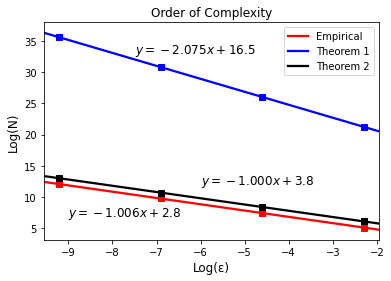

In [332]:
xinfb = .90
slope, intercept, r_value, p_value, std_err = stats.linregress([np.log(e) for e in [.1, .01, .001, .0001]], np.log(error[::-1]))
sns.regplot(x=[np.log(e) for e in [.1, .01, .001, .0001]], y=np.log(error[::-1]), truncate=False, line_kws={"color": "red", 
                                                                                                           'label': "Empirical"})
plt.text(-9, 7, r"$y={0:.3f}x+{1:.1f}$".format(slope,intercept), fontsize=12)
slope, intercept, r_value, p_value, std_err = stats.linregress([np.log(e) for e in [.1, .01, .001, .0001]], np.log([anderson(e,.95,.05,2) for e in [.1, .01, .001, .0001]]))
sns.regplot(x=[np.log(e) for e in [.1, .01, .001, .0001]], y=np.log([anderson(e,.95,.05,2) for e in [.1, .01, .001, .0001]]), truncate=False, line_kws={"color": "blue",
                                                                                                                                                        'label':"Theorem 1"})
plt.text(-7.5, 33, r"$y={0:.3f}x+{1:.1f}$".format(slope,intercept), fontsize=12)
slope, intercept, r_value, p_value, std_err = stats.linregress([np.log(e) for e in [.1, .01, .001, .0001]], np.log([(1/xinfb)*(8/e)*(np.log(4) + np.log(1/(1-np.sqrt(1-.05)))) for e in [.1, .01, .001, .0001]]))
sns.regplot(x=[np.log(e) for e in [.1, .01, .001, .0001]], y=np.log([(1/xinfb)*(8/e)*(np.log(4) + np.log(1/(1-np.sqrt(1-.05)))) for e in [.1, .01, .001, .0001]]), truncate=False, line_kws={"color": "black",
                                                                                                                                                                                             'label':"Theorem 2"})
plt.text(-6, 12, r"$y={0:.3f}x+{1:.1f}$".format(slope,intercept), fontsize=12)
plt.plot([np.log(e) for e in [.1, .01, .001, .0001]], np.log(error[::-1]), "rs")
plt.plot([np.log(e) for e in [.1, .01, .001, .0001]], [np.log(anderson(e,.95,.05,2)) for e in [.1, .01, .001, .0001]], "bs")
plt.plot([np.log(e) for e in [.1, .01, .001, .0001]], [np.log((1/xinfb)*(8/e)*(np.log(4) + np.log(1/(1-np.sqrt(1-.05))))) for e in [.1, .01, .001, .0001]], "ks")
plt.ylabel("Log(N)", size=12)
plt.xlabel("Log(ε)", size=12)
plt.title("Order of Complexity", size=12)
plt.legend()
plt.savefig("error.png")
plt.show()


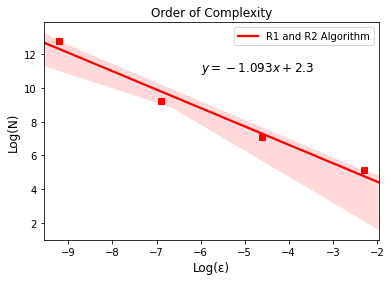

In [327]:

slope, intercept, r_value, p_value, std_err = stats.linregress([np.log(e) for e in [.1, .01, .001, .0001]], np.log([166, 1189, 10172, 358019]))
sns.regplot(x=[np.log(e) for e in [.1, .01, .001, .0001]], y=np.log([166, 1189, 10172, 358019]), truncate=False, line_kws={"color": "red", 
                                                                                                           'label': "R1 and R2 Algorithm"})
plt.plot([np.log(e) for e in [.1, .01, .001, .0001]], np.log([166, 1189, 10172, 358019]), "rs")
plt.text(-6, 11, r"$y={0:.3f}x+{1:.1f}$".format(slope,intercept), fontsize=12)
plt.ylabel("Log(N)", size=12)
plt.xlabel("Log(ε)", size=12)
plt.title("Order of Complexity", size=12)
plt.legend()
plt.savefig("N_for_new_alg.png", bbox_inches='tight')
plt.show()

In [1077]:
np.savetxt("error_samll_eps.csv", error, delimiter=",")

In [377]:
from scipy.spatial.distance import directed_hausdorff
N_table = []
d_h = []
e = .1

In [379]:
(np.arctan(e))

0.09966865249116204

In [ ]:
n = 2
e1 = np.array([[np.sqrt(2)/2],[np.sqrt(2)/2]])
e2 = np.array([[-np.sqrt(2)/2],[np.sqrt(2)/2]])
e3 = np.array([[-np.sqrt(2)/2],[-np.sqrt(2)/2]])
e4 = np.array([[np.sqrt(2)/2],[-np.sqrt(2)/2]])
plt.figure(figsize=(5, 5))
plot = False
e = .0001
#p_ = .95
t = (np.arctan(e))
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8,6)
if plot:
    A_left = np.radians(45+t/2)
    A_right = np.radians(45-t/2)
    B_left = np.radians(135+t/2)
    B_right = np.radians(135-t/2)
    C_left = np.radians(225+t/2)
    C_right = np.radians(225-t/2)
    D_left = np.radians(315+t/2)
    D_right = np.radians(315-t/2)
    A = (A_left, A_right)
    B = (B_left, B_right)
    C = (C_left, C_right)
    D = (D_left, D_right)
    sets = list((A, B,C, D))
    unit = math.pi/4

    letter = A
    a = (np.sin(letter[0])/np.cos(letter[0]))
    b = (np.sin(letter[1])/np.cos(letter[1]))
    #c = (np.sin(unit)/np.cos(unit))
    plt.plot([0,(a/(a+1))],[0, 1/(a+1)], 'r')
    plt.plot([0,(b/(b+1))],[0, 1/(b+1)], 'r')
    #plt.plot([0,(c/(c+1))],[0, 1/(c+1)], 'b--')

    letter = B
    a = -(np.sin(letter[0])/np.cos(letter[0]))
    b = (np.sin(letter[1])/np.cos(letter[1]))
    #c = (np.sin(3*unit)/np.cos(3*unit))
    plt.plot([0, -(a/(a+1))],[0, 1/(a+1)], 'r')
    plt.plot([0,-(b/(b-1))],[0, -1/(b-1)], 'r')
    #plt.plot([0, -(c/(c-1))],[0, -1/(c-1)], 'b--')

    letter = C
    a = -(np.sin(letter[0])/np.cos(letter[0]))
    b = -(np.sin(letter[1])/np.cos(letter[1]))
    #c = -(np.sin(5*unit)/np.cos(5*unit))
    plt.plot([0, -(a/(a-1))],[0, 1/(a-1)], 'r')
    plt.plot([0, (b/(-b+1))],[0, 1/(b-1)], 'r')
    #plt.plot([0,(c/(-c+1))],[0, 1/(c-1)], 'b--')

    letter = D
    a = (np.sin(letter[0])/np.cos(letter[0]))
    b = (np.sin(letter[1])/np.cos(letter[1]))
    #c = (np.sin(7*unit)/np.cos(7*unit))
    plt.plot([0,(a/(a-1))],[0, 1/(a-1)], 'r')
    plt.plot([0,(b/(b-1))],[0, 1/(b-1)], 'r')
    #plt.plot([0,(c/(c-1))],[0, 1/(c-1)], 'b--')


A_inside = []
A_points = []
B_inside = []
B_points = []
C_inside = []
C_points = []
D_inside = []
D_points = []
thresh = 10000000
S = np.zeros((n, 1))
S = np.hstack((S, ell_1(n)))
S = np.delete(S, 0,1)
inside = [0, 0, 0, 0]
inside_r_2 = [0, 0, 0, 0]
clr = "rs"
size_block =  5
r1 = False
for i in range(thresh):
    theta = t
    if np.degrees(np.arccos(np.dot(S[:,i], e1)/la.norm(S[:,i]))) < theta/2:
        inside[0] = 1
        A_inside.append(np.arccos(np.dot(S[:,i], e1)/la.norm(S[:,i])))
        A_points.append(S[:,i])
        if plot:
            plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
    elif np.degrees(np.arccos(np.dot(S[:,i], e2)/la.norm(S[:,i]))) < theta/2:
        inside[1] = 1
        B_inside.append(np.arccos(np.dot(S[:,i], e2)/la.norm(S[:,i])))
        B_points.append(S[:,i])
        if plot:
            plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
    elif np.degrees(np.arccos(np.dot(S[:,i], e3)/la.norm(S[:,i]))) < theta/2:
        inside[2] = 1
        C_inside.append(np.arccos(np.dot(S[:,i], e3)/la.norm(S[:,i])))
        C_points.append(S[:,i])
        if plot:
            plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
    elif np.degrees(np.arccos(np.dot(S[:,i], e4)/la.norm(S[:,i]))) < theta/2:
        inside[3] = 1
        D_inside.append(np.arccos(np.dot(S[:,i], e4)/la.norm(S[:,i])))
        D_points.append(S[:,i])
        if plot:
            plt.plot(S[0,i], S[1,i], clr, markersize=size_block)
    else:
        if plot:
            plt.plot(S[0,i], S[1,i],"bo", markersize=2)
    if sum(inside) == 4:
        r1 = True
    
    point = ell_1(n)
    if point[0] > 0 and point[1] > 0 and la.norm(point, 1) >= 1-e:
        inside_r_2[0] = 1
        if plot:
            plt.plot(point[0], point[1], "ko", markersize=size_block)
    elif point[0] < 0 and point[1] > 0 and la.norm(point, 1) >= 1-e:
        inside_r_2[1] = 1
        if plot:
            plt.plot(point[0], point[1], "ko", markersize=size_block)
    elif point[0] > 0 and point[1] < 0 and la.norm(point, 1) >= 1-e:
        inside_r_2[2] = 1
        if plot:
            plt.plot(point[0], point[1], "ko", markersize=size_block)
    elif point[0] < 0 and point[1] < 0 and la.norm(point, 1) >= 1-e:
        inside_r_2[3] = 1
        if plot:
            plt.plot(point[0], point[1], "ko", markersize=size_block)
    else:
        if plot:
            plt.plot(point[0], point[1],"bo", markersize=2)
    if r1 and sum(inside_r_2) == 4:
        break
        
    S = np.hstack((S, ell_1(n)))


N = S.shape[1]
print(N)


t_ = [A_points[np.argmax(A_inside)], B_points[np.argmax(B_inside)], C_points[np.argmax(C_inside)], D_points[np.argmax(D_inside)]]
thetas = [cart2pol(t_[0][0], t_[0][1]), cart2pol(t_[1][0], t_[1][1]), 360+cart2pol(t_[2][0], t_[2][1]), 360+cart2pol(t_[3][0], t_[3][1])]
directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
colors = np.array([[np.dot(S[:,i], directions[j]) for i in range(N)] for j in range(4)])
scales = [np.dot(S[:,np.argmax(colors[i])], directions[i]) for i in range(4)]
supports = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], False) for i in range(4)])
#supports = np.array([ret_supp([directions[i][0], directions[i][1]], False) for i in range(4)])
for i in range(4):
        plt.plot(supports[i][0], supports[i][1], "k", linewidth=2)

if plot:
    plt.plot(np.arange(-1,1, .001), [(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
    plt.plot(np.arange(-1,1, .001), [-(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
    plt.xlim(-1.25,1.25)
    plt.ylim(-1.25,1.25)
    ax.set_aspect('equal')
    plt.title(r"$\epsilon = .0001$",size=15)
    plt.savefig("ep0001.png", bbox_inches='tight')
    plt.show()
# u = np.array([[1.0, 0.0],

#              [0.0, 1.0],

#               [-1.0, 0.0],

#               [0.0, -1.0]])

# v = S


N_table.append(N)


In [306]:
N_table.append(N)

In [307]:
N_table

[166, 1189, 10172, 358019]

In [359]:
from scipy.spatial.distance import directed_hausdorff
N_table = []
d_h = []


In [363]:
epsilon_d_h = .0001
delta_d_h = .05
N = int(np.ceil(1*(8/epsilon_d_h)*(np.log(4)+np.log(1/(1-np.sqrt(1-delta_d_h))))))

S = np.zeros((n, 1))
for i in tqdm(range(N)):
    S = np.hstack((S, ell_1(n)))
S = np.delete(S, 0,1)
print("here")
fb_d_h = compute_fb(S, 1, 2)

d_h.append(1-la.norm(S, 1))
N_table.append(N)

here


In [364]:
N_table

[405, 4050, 40500, 404995]

In [172]:
import pandas as pd
table = np.array([d_h, N_table])
pd.DataFrame(table.T, index = e_, columns=[r'$d_H$', r'$N$'])

,$d_H$,$N$
0.1000,1.077556e-03,421.0
0.0100,4.190159e-04,4207.0
0.0010,6.801858e-06,42068.0
0.0001,1.560297e-07,420675.0


1


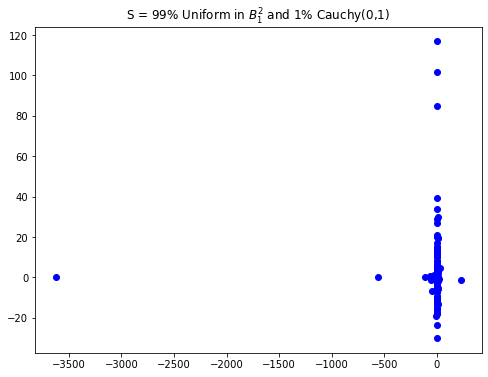

In [341]:
import scipy.stats as spy
epsilon_c = .001
delta_c = 1-np.sqrt(1-.05)
q__ = .99
p_ = .99
#s = 1/np.tan(math.pi*(1/2-(1-q__)/(2*(1-p_))))
s = 1

print(s)
N = math.ceil((1/(2*q__-1)) * 4 * (2+ epsilon_c)/(epsilon_c)*(np.log(4)+ np.log(1/delta_c)))

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8,6)

samples_n= np.zeros((n, 1))
for i in range(N):
    choice = np.random.choice(2, 1, p=[p_, 1-p_])
    if(choice == 0):
        samples_n = np.hstack((samples_n, ell_1(n)))
    if(choice == 1):
        samples_n = np.hstack((samples_n,np.vstack((stats.cauchy.rvs(loc=0, scale=s, size=1), stats.cauchy.rvs(loc=0, scale=s, size=1)))))
plt.plot(samples_n[0,:], samples_n[1, :], "bo")
plt.title(r"S = 99% Uniform in $B^2_1$ and 1% Cauchy(0,1)")
plt.savefig("cauchy.png", bbox_inches='tight')

plt.show()

<ipython-input-336-a5f13d64593b>:7: RuntimeWarning: invalid value encountered in true_divide
  if support(X, X[:,i] / la.norm(X[:,i]), q) > np.dot(X[:,i], X[:,i]/la.norm(X[:,i])):


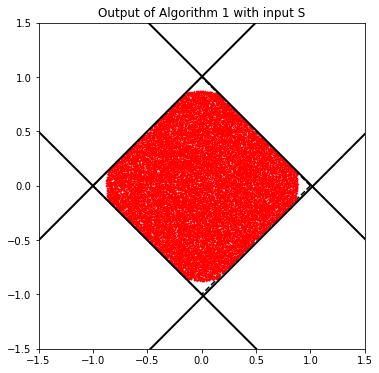

In [342]:
fb = compute_fb(samples_n, q__, 2)
t_ = np.degrees(2*(math.pi/4-((np.arctan(1/(1+epsilon_c))))))
thetas = [45, 135, 225, 315]
thetas = [thetas[i] + t_ for i in range(4)] 
directions = [[np.cos(np.radians(thetas[i])), np.sin(np.radians(thetas[i]))] for i in range(4)]
colors = np.array([[np.dot(fb[:,i], directions[j]) for i in range(fb.shape[1])] for j in range(4)])
scales = [np.dot(fb[:,np.argmax(colors[i])], directions[i]) for i in range(4)]
supports = np.array([ret_supp([directions[i][0]*scales[i], directions[i][1]*scales[i]], False) for i in range(4)])

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(8,6)
ax.set_aspect('equal')
plt.plot(np.arange(-1,1, .001), [(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
plt.plot(np.arange(-1,1, .001), [-(1-np.abs(x)) for x in np.arange(-1,1, .001)], 'k--')
plt.plot(fb[0,:], fb[1, :], "ro", markersize = .5)

for i in range(4):
        plt.plot(supports[i][0], supports[i][1], "k", linewidth=2)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.title("Output of Algorithm 1 with input S", size=12)



plt.savefig("fb_cauchy.png", bbox_inches='tight')


In [314]:
N

24912

In [1006]:
directed_hausdorff(u, v.T)

(0.15951909458758143, 1, 22)

(2, 177)

100%|██████████| 100/100 [00:00<00:00, 797.66it/s]


[]

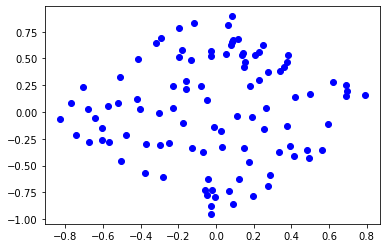

In [338]:
N = 100

S = np.zeros((n, 1))
for i in tqdm(range(N)):
    S = np.hstack((S, ell_1(n)))
    S = np.delete(S, 0,1)
    plt.plot(S[0, :], S[1, :], "bo")
    temp = compute_fb(S, .95, 2)
    plt.plot(temp[0, :], temp[1, :], "ro")
plt.plot()
